In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import seaborn as sns

In [52]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
# region = ["northeast","northwest","southwest","southeast"]
# def dirConv(d):
#     return region.index(d)
# df['region'] = df['region'].map(dirConv)
df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,1,16884.92400
1,18,male,33.770,1,no,0,1725.55230
2,28,male,33.000,3,no,0,4449.46200
3,33,male,22.705,0,no,2,21984.47061
4,32,male,28.880,0,no,2,3866.85520


In [54]:
# def smokeconv(a):
#     if a == "yes":
#         return 1
#     else:
#         return 0
# df["smoker"] = df["smoker"].map(smokeconv)
df.replace({'smoker':{'no':0,'yes':1}},inplace=True)
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,1,16884.92400
1,18,male,33.770,1,0,0,1725.55230
2,28,male,33.000,3,0,0,4449.46200
3,33,male,22.705,0,0,2,21984.47061
4,32,male,28.880,0,0,2,3866.85520


In [55]:
# def sexconv(c):
#     if c == 'female':
#         return 0
#     return 1
# df["sex"] = df["sex"].map(sexconv)
df.replace({'sex':{'male':1,'female':0}},inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [56]:
df.dropna(inplace=True)
X = np.array(df.drop(["charges"], axis=1))
y = np.array(df["charges"])

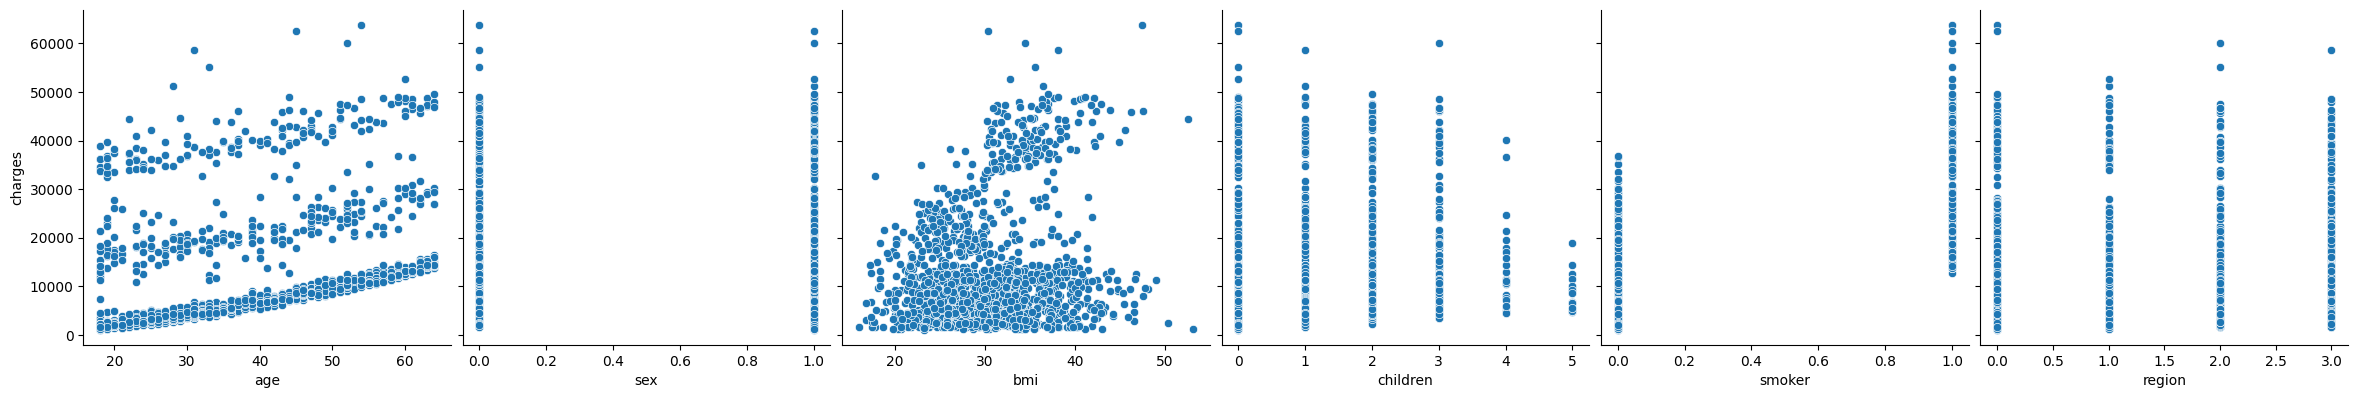

In [57]:
sns.pairplot(df, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'], y_vars='charges', height=4, aspect=1, kind='scatter')

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)

In [59]:
lr = LinearRegression(
    
)
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
lr.score(X_test,y_test)

0.7673698638169365

In [61]:
cb = CatBoostRegressor(diffusion_temperature=0.7,learning_rate=0.0085,random_seed=12)
cb.fit(X_train, y_train)

0:	learn: 11970.6507926	total: 876us	remaining: 875ms
1:	learn: 11894.3418548	total: 2.1ms	remaining: 1.05s
2:	learn: 11824.6274613	total: 2.97ms	remaining: 986ms
3:	learn: 11757.1002587	total: 3.71ms	remaining: 923ms
4:	learn: 11684.6288636	total: 4.35ms	remaining: 865ms
5:	learn: 11615.8799460	total: 4.82ms	remaining: 798ms
6:	learn: 11543.7510052	total: 5.04ms	remaining: 715ms
7:	learn: 11470.4617062	total: 5.99ms	remaining: 742ms
8:	learn: 11401.4699685	total: 6.73ms	remaining: 741ms
9:	learn: 11334.9410433	total: 7.15ms	remaining: 708ms
10:	learn: 11264.9343951	total: 7.77ms	remaining: 699ms
11:	learn: 11196.8654381	total: 8.46ms	remaining: 696ms
12:	learn: 11132.3614629	total: 8.97ms	remaining: 681ms
13:	learn: 11066.1958542	total: 9.57ms	remaining: 674ms
14:	learn: 10997.3566014	total: 10.1ms	remaining: 663ms
15:	learn: 10929.2659493	total: 10.6ms	remaining: 655ms
16:	learn: 10863.3261929	total: 11.2ms	remaining: 649ms
17:	learn: 10803.4273184	total: 11.7ms	remaining: 639ms
18:	

In [62]:
cb.score(X_test,y_test)

0.8685642564529643

In [63]:
xgb = XGBRegressor(n_estimators = 100, learning_rate = 0.085 , max_depth = 6)
xgb.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.085, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [64]:
xgb.score(X_test,y_test)

0.8497939246300289

In [74]:
rf = RandomForestRegressor(n_estimators=100, random_state= 42, )
rf.fit(X_train,y_train)


RandomForestRegressor(random_state=42)

In [75]:
rf.score(X_test,y_test)

0.8467161230334438